In [ ]:
import numpy as np

# αρχικά, δημιουργούμε ένα ημίτονο 5000Hz
# δημιουργούμε μια αναπαράσταση του χρόνου, πχ 1 δευτερόλεπτο, με 44100 δειγματοληψία
t = np.arange(44100)/44100
# ορίζουμε μια συχνότητα
f = 500
# δημιουργούμε το ημίτονο
s = np.sin( 2*np.pi*f*t )

In [ ]:
from IPython.display import Audio
Audio( s , rate=44100 )

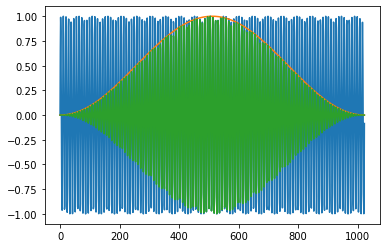

In [ ]:
# όπως στο audacity, επιλέγουμε ένα μήκος παραθύρου για να τρέξουμε το fft (πχ 1024, 2048, ...)
# το μήκος παραθύρου πρέπει να είναι δύναμη του 2 για τρέξει ο αλγόριθμος πιο αποδοτικά
fft_size = 1024

# 1) πρέπει από το σήμα να πάρουμε πχ τα πρώτα fft_size δείγματα
s_part = s[:fft_size]

# 2) εφαρμόζουμε μια περιβάλλουσα έντασης, συνήθως χρησιμοποιώντας ένα Hanning window
w = np.hanning( fft_size )

import matplotlib.pyplot as plt

plt.plot(s_part)
plt.plot(w)
plt.plot(w*s_part)

In [ ]:
# 3) εφαρμόζουμε τον αλγόριθμο που μας δίνει το fft
# ΠΡΟΣΟΧΗ: το εφαρμόζουμε στο "παραθυρωμένο" σήμα, δηλ. που έχει πολλαπλασιαστεί
# με την περιβάλλουσα
y = np.fft.fft( w*s_part )

# παρατηρούμε ότι το y περιλαμβάνει fft_size μιγαδικούς αριθμούς
# print(y)
# print(len(y))

# 4) από αυτούς τους αριθμούς, για να πάρουμε πληροφορία για τη συχνότητα, μας αρκεί να κρατήσουμε
# τη στάθμη τους, ή το μέτρο τους
# από το Πυθαγόρειο θεώρημα:
y_mag = np.sqrt( y.real**2 + y.imag**2 )
# Σημείωση: στη numpy ένας μιγαδικός αριθμός y, απότελείται από 2 πεδία:
# το πραγματικό: y.real
# το φανταστικό: y.imag
print(y[:5])
print(y.real[:5])
print(y.imag[:5])
print(y_mag[:5])

[-1.90318961e-07+0.00000000e+00j -1.90674852e-07+2.03573996e-07j
 -1.91746113e-07+4.07830799e-07j -1.93542817e-07+6.13456062e-07j
 -1.96081569e-07+8.21139869e-07j]
[-1.90318961e-07 -1.90674852e-07 -1.91746113e-07 -1.93542817e-07
 -1.96081569e-07]
[0.00000000e+00 2.03573996e-07 4.07830799e-07 6.13456062e-07
 8.21139869e-07]
[1.90318961e-07 2.78925207e-07 4.50657888e-07 6.43262903e-07
 8.44226667e-07]


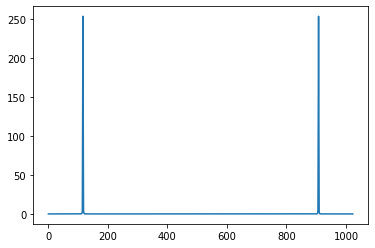

In [ ]:
plt.plot(y_mag)

512.0
512


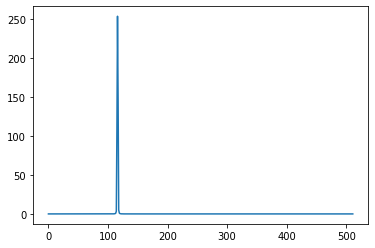

In [ ]:
# 5) για να δούμε το "οφέλιμο" φάσμα, αρκεί να κρατήσουμε το πρώτο μισό
plt.plot(y_mag[ :fft_size//2 ])
# print(fft_size/2)
# print(fft_size//2)

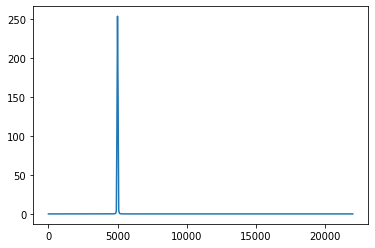

In [ ]:
# θέλουμε να χωρίσουμε το εύρος των συχνοτήτων που απεικονίζουμε στα αντίστοιχα κουτάκια
# δηλ να φαίνονται στον οριζόντιο άξονα αντί για τιμές του δείκτη, οι τιμές των συχνοτήτων

# ξέρουμε ότι το εύρος συχνοτήτων που θέλουμε να απεικονίσουμε μέχρι τη συχνότητα Nyquist,
# δηλαδή μέχρι το μισό της συχνότητας δειγματοληψίας, δηλ 44100/2,
# στα μισά κουτάκια από το fft_size
# frequencies = np.linspace(0, 22050, 512, endpoint=False) # αν έχουμε πχ 1024 μέγεθος παραθύρου
frequencies = np.linspace(0, 22050, fft_size//2, endpoint=False)
# print(frequencies)

plt.plot( frequencies , y_mag[:fft_size//2] )

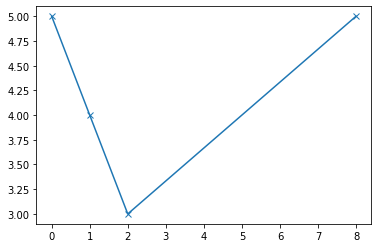

In [ ]:
# mini plot tutorial
x = [0, 1, 2, 8]
# plt.plot(x, '.-')
y = [5, 4, 3, 5]
plt.plot(x,y , 'x-')